<a href="https://colab.research.google.com/github/fjadidi2001/DataScienceJourney/blob/master/PINNs_S4%265.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> You know how we can use blocks to build all sorts of things, like a castle or a car? And we know how blocks work, like how they stack up and how they don't just float away.Well, PINNs are like super smart blocks for computers. But instead of building with blocks, they use special rules about how the world works, like how things move or how heat spreads. These rules are like the blocks!Just like we can use blocks and our knowledge of how they work to build lots of different things, PINNs use these special rules and build with them to understand all sorts of problems, like how water flows or how the air moves around a plane.And the really cool thing about PINNs is that they can learn and get better at building with these rule blocks over time, just like how you get better at building with blocks the more you practice!

# Train the model using NN methods

## Step 1: Import Necessary Libraries


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


## Step 2: Load and Prepare the Dataset


In [ ]:
# Load the dataset
california_housing = fetch_california_housing(as_frame=True)


as_frame (default: False): If set to True, the function returns the dataset as a pandas DataFrame rather than as a NumPy array.



In [ ]:
print(california_housing.DESCR)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
california_housing.frame.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
california_housing.data.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
california_housing.target.head()


,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [ ]:
california_housing.frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


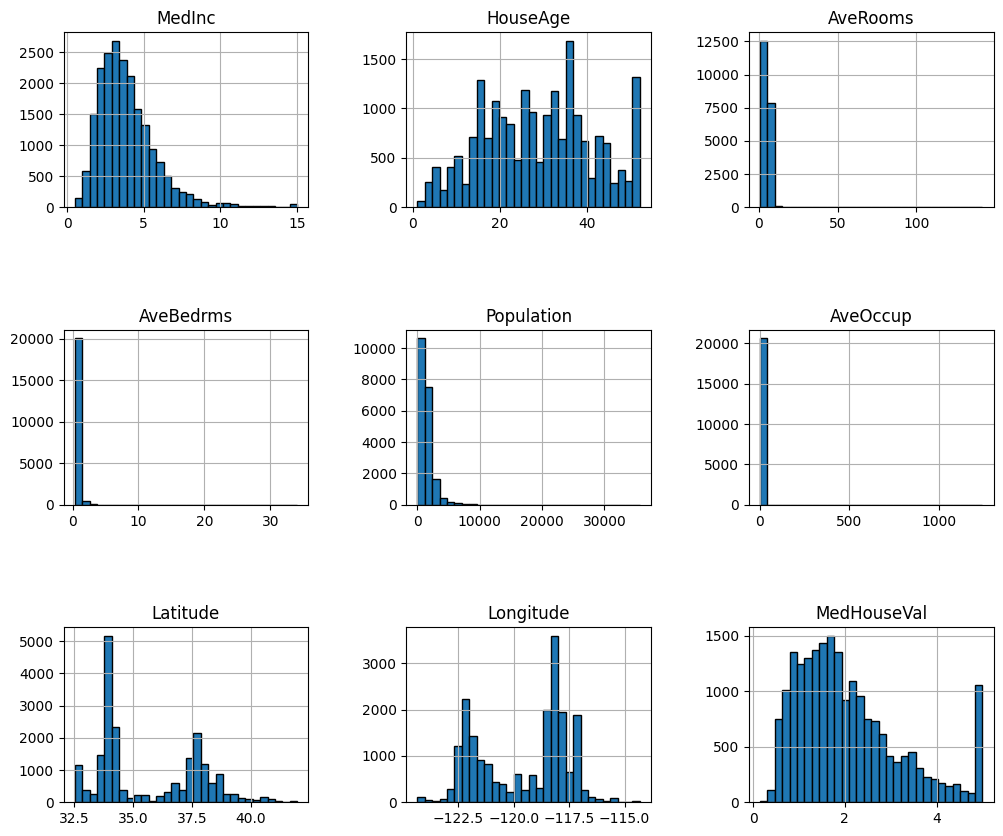

In [ ]:
import matplotlib.pyplot as plt

california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)


1. **Importing Library**: `import matplotlib.pyplot as plt` imports the `matplotlib.pyplot` module, which contains functions for creating various types of plots.

2. **Creating Histograms**:
   - `california_housing.frame.hist(...)`: This calls the `hist()` method on the `frame` of the `california_housing` dataset, which generates histograms for all numerical columns.
   - `figsize=(12, 10)`: This sets the size of the figure to 12 inches wide and 10 inches tall.
   - `bins=30`: Specifies that each histogram should be divided into 30 bins (intervals).
   - `edgecolor="black"`: This sets the color of the edges of the bins to black, making them more visually distinct.

3. **Adjusting Subplots**:
   - `plt.subplots_adjust(hspace=0.7, wspace=0.4)`: This adjusts the spacing of the subplots, where `hspace=0.7` controls the vertical space between rows of plots and `wspace=0.4` controls the horizontal space between columns of plots.



In [ ]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
california_housing.frame[features_of_interest].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000



1. **Defining Features of Interest**:
   ```python
   features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
   ```
   - This line creates a list named `features_of_interest`, which includes four specific columns:
     - `AveRooms`: Average number of rooms per dwelling.
     - `AveBedrms`: Average number of bedrooms per dwelling.
     - `AveOccup`: Average number of occupants per dwelling.
     - `Population`: The population in the area.

2. **Descriptive Statistics**:
   ```python
   california_housing.frame[features_of_interest].describe()
   ```
   - This line accesses the DataFrame of the California housing dataset and selects only the columns specified in `features_of_interest`.
   - The `describe()` method is then called on this filtered DataFrame, which computes and returns descriptive statistics for the selected features. This typically includes:
     - Count: Number of non-null entries.
     - Mean: Average value.
     - Standard Deviation (std): Measure of variation.
     - Minimum (min): The smallest value.
     - 25th, 50th (median), and 75th percentiles: Measures of central tendency and dispersion.
     - Maximum (max): The largest value.

In summary, this code filters the California housing dataset to focus on four specific features and then computes descriptive statistics for those features, providing a summary of their distributions.


In [ ]:

# Convert to DataFrame for better visualization
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['Target'] = california_housing.target

# Display the first few rows of the dataset
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



1. **Convert to DataFrame**:
   ```python
   df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
   ```
   - This line creates a new DataFrame named `df` using the `pd.DataFrame()` constructor from the pandas library.
   - `california_housing.data`: This contains the actual data values from the California housing dataset.
   - `columns=california_housing.feature_names`: This assigns the column names to the DataFrame based on the names provided in the dataset.

2. **Add Target Column**:
   ```python
   df['Target'] = california_housing.target
   ```
   - This line adds a new column named `Target` to the DataFrame `df`.
   - `california_housing.target`: This contains the target variable (the house prices) associated with the dataset.

3. **Display the First Few Rows**:
   ```python
   df.head()
   ```
   - This function call retrieves and displays the first five rows of the DataFrame `df`.
   - This is useful for getting a quick overview of the dataset, including the features and the target.

In summary, the code creates a more user-friendly DataFrame from the California housing dataset, adds the target variable, and then shows the initial rows to allow for better visualization and inspection of the data.


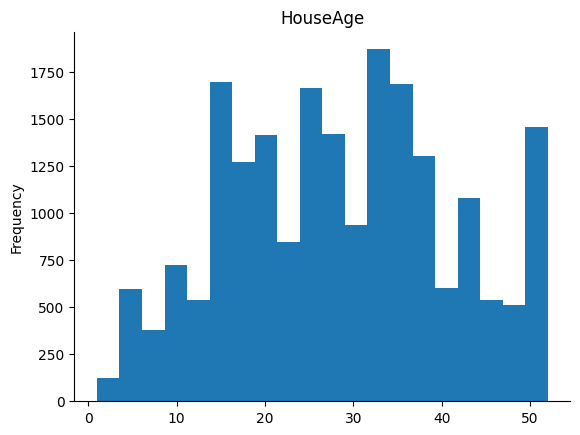

In [ ]:
# @title HouseAge

from matplotlib import pyplot as plt
df['HouseAge'].plot(kind='hist', bins=20, title='HouseAge')
plt.gca().spines[['top', 'right',]].set_visible(False)


1. **Importing Matplotlib**:
   ```python
   from matplotlib import pyplot as plt
   ```
   - This line imports the `pyplot` module from the `matplotlib` library, which is used for creating visualizations.

2. **Creating Histogram**:
   ```python
   df['HouseAge'].plot(kind='hist', bins=20, title='HouseAge')
   ```
   - `df['HouseAge']`: This accesses the "HouseAge" column from the DataFrame `df`.
   - `.plot(kind='hist', ...)`: This method is used to create a histogram.
     - `kind='hist'`: Specifies that the plot type is a histogram.
     - `bins=20`: Sets the number of bins (intervals) to 20, which determines how the data will be grouped.
     - `title='HouseAge'`: Labels the histogram with the title "HouseAge".

3. **Hiding Top and Right Spines**:
   ```python
   plt.gca().spines[['top', 'right',]].set_visible(False)
   ```
   - `plt.gca()`: Gets the current Axes instance on the current figure.
   - `.spines[['top', 'right',]]`: Accesses the top and right spines (the lines that form the borders of the plot).
   - `.set_visible(False)`: Hides the top and right spines to create a cleaner visual appearance for the histogram.

In summary, this code snippet generates a histogram to show the distribution of house ages in the dataset and modifies the plot's appearance by removing the top and right borders for better aesthetics.


## Step 3: Split the Data into Features and Target


In [ ]:
# Split the data into features (X) and target (y)
X = df.drop('Target', axis=1)
y = df['Target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



1. **Split the Data into Features and Target**:
   ```python
   X = df.drop('Target', axis=1)
   y = df['Target']
   ```
   - `X = df.drop('Target', axis=1)`: This line creates a new DataFrame `X` that contains all columns from `df` except the "Target" column (which holds the house prices). The `axis=1` parameter indicates that a column is being dropped.
   - `y = df['Target']`: This line creates a variable `y` which holds only the "Target" column, representing the dependent variable (house prices).

2. **Split into Train and Test Sets**:
   ```python
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
   ```
   - This line uses the `train_test_split` function (typically imported from `sklearn.model_selection`) to divide the data into training and testing sets.
   - `X_train, X_test`: These variables store the features for training and testing, respectively.
   - `y_train, y_test`: These variables store the target values for training and testing, respectively.
   - `test_size=0.2`: This specifies that 20% of the data will be used for testing, while the remaining 80% will be used for training.
   - `random_state=42`: This parameter sets a seed for reproducibility, ensuring that every time this code is run, the same split of the data will be achieved.

In summary, the code separates the dataset into features and target values, and it splits this data into training and testing sets to prepare for modeling.


## Step 4: Scale the Features


In [ ]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



1. **Importing the StandardScaler**:
   ```python
   scaler = StandardScaler()
   ```
   - This line creates an instance of `StandardScaler`, which is a preprocessing tool from the `sklearn.preprocessing` module. It standardizes features by removing the mean and scaling to unit variance.

2. **Fitting and Transforming the Training Data**:
   ```python
   X_train = scaler.fit_transform(X_train)
   ```
   - `scaler.fit_transform(X_train)`: This method first fits the `StandardScaler` to the training data (`X_train`) and then transforms it. The fitting process calculates the mean and standard deviation for each feature in the training data.
   - The transformed data replaces the original `X_train`, resulting in scale-adjusted feature values that have a mean of 0 and a standard deviation of 1.

3. **Transforming the Testing Data**:
   ```python
   X_test = scaler.transform(X_test)
   ```
   - `scaler.transform(X_test)`: This method is used to transform the testing data (`X_test`) using the same scaling parameters (mean and standard deviation) calculated from the training data. This ensures that the test data is scaled consistently with the training data.
   - The transformed data replaces the original `X_test`.

In summary, this code scales the features of both the training and testing datasets to have a mean of 0 and unit variance, which can improve the performance of machine learning algorithms.


## Step 5: Create and Compile the Model


In [ ]:
# Create the model
model = models.Sequential()

# Add layers
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



1. **Create the Model**:
   ```python
   model = models.Sequential()
   ```
   - This line initializes a sequential model, which is a linear stack of layers. The Keras `Sequential` API allows you to build a neural network layer by layer.

2. **Add Layers**:
   ```python
   model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
   ```
   - `model.add(layers.Dense(64, activation='relu', ...))`: This adds a dense (fully connected) layer with 64 neurons.
     - `activation='relu'`: Specifies the ReLU (Rectified Linear Unit) activation function, which introduces non-linearity to the model.
     - `input_shape=(X_train.shape[1],)`: Defines the shape of the input data. `X_train.shape[1]` represents the number of features in the training data.

   ```python
   model.add(layers.Dense(64, activation='relu'))
   ```
   - This adds another dense layer with 64 neurons and the same ReLU activation function, creating a second hidden layer.

   ```python
   model.add(layers.Dense(1))
   ```
   - This line adds the output layer with a single neuron. This is typical for regression tasks (predicting continuous values) like house prices.

3. **Compile the Model**:
   ```python
   model.compile(optimizer='adam', loss='mse', metrics=['mae'])
   ```
   - This line configures the model for training.
     - `optimizer='adam'`: Uses the Adam optimizer, which is an efficient stochastic gradient descent algorithm.
     - `loss='mse'`: Sets the loss function to mean squared error (MSE), which measures the average squared difference between predicted and actual values—a common choice for regression problems.
     - `metrics=['mae']`: Specifies that mean absolute error (MAE) should also be tracked during training as a performance metric.

In summary, this code builds a neural network with two hidden layers, compiles it with the Adam optimizer and MSE loss function, and prepares it for training on regression tasks like predicting house prices.


In [ ]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,801 (18.75 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 0 (0.00 B)

## Step 6: Train the Model


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32)


Epoch 1/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 186.0295 - mae: 5.9350 - val_loss: 1.1235 - val_mae: 0.8085
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.4192 - mae: 0.8967 - val_loss: 1.4410 - val_mae: 1.0228
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.5823 - mae: 0.8757 - val_loss: 304.2381 - val_mae: 14.6544
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 49.8039 - mae: 3.8392 - val_loss: 1.0459 - val_mae: 0.8242
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3670 - mae: 1.1110 - val_loss: 12.1808 - val_mae: 2.6942
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 39.9122 - mae: 3.1880 - val_loss: 1.4928 - val_mae: 0.9825
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4654 - mae: 0.8492 - val_loss: 1.2882 - val_mae: 0.9060
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17.7572 - mae: 1.9040 - val_loss: 0.7290 - val_mae: 0.6488
Epoch 9/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

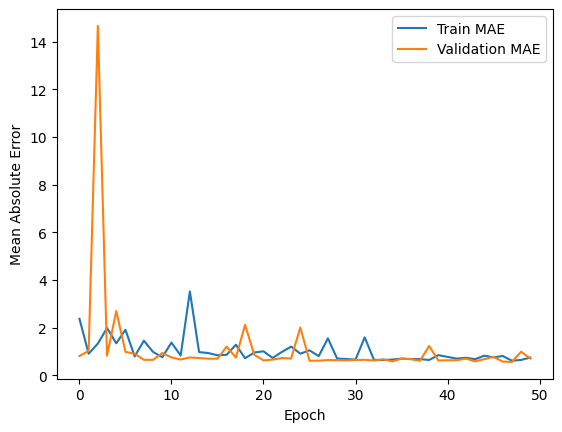

In [ ]:
# Plot training history
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()



- **Data Preparation:** We loaded the California Housing dataset, split it into training and test sets, and scaled the features.
- **Model Creation:** We built a simple feedforward neural network with two hidden layers.
- **Training:** We trained the model for 50 epochs and monitored its performance using validation data.
- **Evaluation:** We evaluated the model on the test set and visualized the results to understand its performance.



## Step 7: Evaluate the Model


In [ ]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test MAE: {test_mae}')


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6996 - mae: 0.6984
Test MAE: 0.7011523842811584


## Step 8: Make Predictions


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)
print(y_pred)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[1.1569897]
 [1.9981943]
 [3.1375022]
 ...
 [4.579888 ]
 [2.094378 ]
 [2.1077695]]


# Train the California Housing dataset with a basic PINN structure

## Step 1: Import Necessary Libraries


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K


1. numpy and pandas: These are fundamental libraries for data manipulation. numpy handles arrays and numerical operations, while pandas works with structured data like DataFrames.
2. sklearn.datasets: fetch_california_housing loads a housing dataset from California.
3. train_test_split: This function is used to split data into training and testing sets.
4. StandardScaler: Used to normalize data by centering it to have a mean of 0 and a standard deviation of 1.
5. tensorflow: A deep learning framework used to build and train neural networks.
6. matplotlib.pyplot: Used for plotting graphs.
7. tensorflow.keras.backend (K): Provides low-level operations like handling gradients

## Step 2: Load and Prepare the Dataset


In [ ]:
# Load the dataset
california = fetch_california_housing()

# Convert to DataFrame for better visualization
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Target'] = california.target

# Display the first few rows of the dataset
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


1. fetch_california_housing(): Downloads the California housing dataset, a collection of house features and target prices.
2. pd.DataFrame: Converts the dataset into a DataFrame for better readability.
3. df['Target']: Adds a column for the target variable (house prices).
4. df.head(): Displays the first few rows of the dataset.

## Step 3: Split the Data into Features and Target


In [ ]:
# Split the data into features (X) and target (y)
X = df.drop('Target', axis=1)
y = df['Target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


1. X = df.drop('Target', axis=1): Separates the feature columns from the target.
2. y = df['Target']: The target column (housing prices).
3. train_test_split(): Splits the data into training (80%) and testing (20%) sets. The random_state=42 ensures reproducibility.


## Step 4: Scale the Features


In [ ]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


1. Feature scaling: Neural networks perform better when features are normalized.
 - fit_transform(): Fits the scaler on the training data and transforms it.
 - transform(): Uses the same transformation on the test data.


## Step 5: Define the PINN Model


In [ ]:
# Define the PINN model
class PINN(tf.keras.Model):
    def __init__(self):
        super(PINN, self).__init__()
        self.hidden_layer_1 = layers.Dense(64, activation='relu')
        self.hidden_layer_2 = layers.Dense(64, activation='relu')
        self.output_layer = layers.Dense(1)

    def call(self, inputs):
        x = self.hidden_layer_1(inputs)
        x = self.hidden_layer_2(x)
        return self.output_layer(x)

    def train_step(self, data):
        X, y = data

        with tf.GradientTape() as tape:
            y_pred = self(X, training=True)
            loss = self.compiled_loss(y, y_pred)

            # Implement the PINN constraint (derivative constraint)
            with tf.GradientTape() as tape2:
                tape2.watch(X)
                y_pred = self(X, training=True)
            gradients = tape2.gradient(y_pred, X)
            constraint_loss = K.mean(tf.square(gradients[:, 0] - 1.0))  # constraint

            total_loss = loss + constraint_loss

        trainable_vars = self.trainable_variables
        gradients = tape.gradient(total_loss, trainable_vars)
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        self.compiled_metrics.update_state(y, y_pred)
        return {m.name: m.result() for m in self.metrics}


- class PINN(tf.keras.Model): Defines a neural network (Physics-Informed Neural Network or PINN).
  - self.hidden_layer_1/2: These are hidden layers with 64 neurons and ReLU activation. ReLU introduces non-linearity.
  - self.output_layer: Output layer with 1 neuron since this is a regression problem (predicting housing prices).
  - call(self, inputs): The forward pass of the network, where data moves through each layer.

- train_step(self, data): Custom training loop, overriding the default one.
  - GradientTape(): Tracks operations to compute gradients. Two tapes are used:
    - The first computes the normal prediction loss.
    - The second computes the constraint loss based on the derivative of the output with respect to input.
- constraint_loss: This enforces a physics-based constraint on the derivative of the output.
- total_loss: Sum of the normal loss and the constraint loss.
- optimizer.apply_gradients(): Updates the model's parameters based on the total loss.
- compiled_metrics.update_state(): Updates metrics (e.g., MAE) after each training step.

In [ ]:
# Instantiate the model
pinn_model = PINN()

# Compile the model with a custom training step
pinn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

- PINN(): Instantiates the PINN model.
- compile(): Configures the model with:
    - adam: A popular optimization algorithm.
    - loss='mse': The mean squared error loss function (used for regression).
    - metrics=['mae']: Mean absolute error, another performance metric

## Step 6: Train the PINN Model


In [ ]:
# Train the PINN model
history = pinn_model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:607: UserWarning: `model.compiled_loss()` is deprecated. Instead, use `model.compute_loss(x, y, y_pred, sample_weight, training)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:582: UserWarning: `model.compiled_metrics()` is deprecated. Instead, use e.g.:
```
for metric in self.metrics:
    metric.update_state(y, y_pred)
```

  return self._compiled_metrics_update_state(


413/413 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - mae: 0.7957 - loss: 1.6932 - val_loss: 0.4690 - val_mae: 0.4901
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - mae: 0.4697 - loss: 2.0376 - val_loss: 0.4316 - val_mae: 0.4627
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - mae: 0.4381 - loss: 2.0556 - val_loss: 0.4113 - val_mae: 0.4490
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - mae: 0.4409 - loss: 2.0550 - val_loss: 0.4013 - val_mae: 0.4486
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - mae: 0.4322 - loss: 2.0619 - val_loss: 0.4220 - val_mae: 0.4502
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - mae: 0.4217 - loss: 2.0656 - val_loss: 0.3925 - val_mae: 0.4374
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - mae: 0.4219 - loss: 2.0585 - val_loss: 0.4003 - val_mae: 0.4320
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - mae: 0.4173 - loss: 2.0474 - val_loss: 0.3817 - val_mae: 0.4294
Epoch 9/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - mae: 0.4173 -

- **fit()**: Trains the model.
  - **epochs=50**: Runs the training for 50 epochs.
  - **validation_split=0.2**: Uses 20% of the training data for validation during training.
  - **batch_size=32:** Processes 32 samples per training step.

## Step 7: Plot Training History


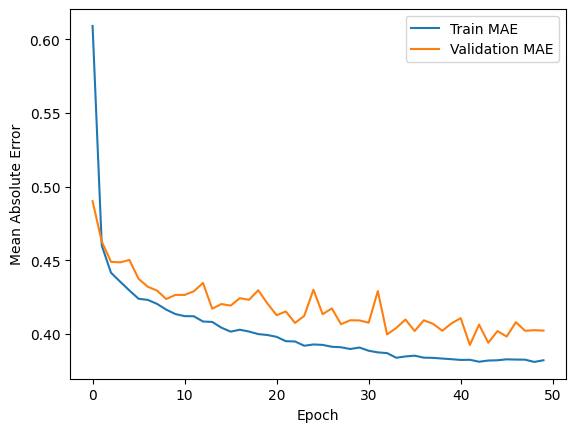

In [ ]:
# Plot training history
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()


## Step 8: Evaluate the PINN Model


In [ ]:
# Evaluates the model on the test data, returning loss and mean absolute error
test_loss, test_mae = pinn_model.evaluate(X_test, y_test)
print(f'Test MAE: {test_mae}')


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3151 - mae: 0.3906
Test MAE: 0.3958660364151001


- evaluate(): Evaluates the model on the test data, returning loss and mean absolute error.
- print(f'Test MAE: {test_mae}'): Outputs the test MAE.


## Step 9: Make Predictions


In [ ]:
# Make predictions on the test set
y_pred = pinn_model.predict(X_test)
print(y_pred)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0.6765418]
 [1.4998381]
 [4.589984 ]
 ...
 [4.828855 ]
 [0.6701598]
 [1.7663598]]


# Implement Physics-Informed Multi-Task Learning with TensorFlow on the California Housing dataset

## Step 1: Import Necessary Libraries


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K


## Step 2: Load and Prepare the Dataset


In [2]:
# Load the dataset
california = fetch_california_housing()

# Convert to DataFrame for better visualization
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Target'] = california.target

# Split the data into features (X) and target (y)
X = df.drop('Target', axis=1)
y = df['Target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Step 3: Define the Physics-Informed Multi-Task Model


In [3]:
class PIMTL(tf.keras.Model):
    def __init__(self):
        super(PIMTL, self).__init__()
        # Shared layers for both tasks
        self.shared_layer_1 = layers.Dense(64, activation='relu')
        self.shared_layer_2 = layers.Dense(64, activation='relu')

        # Output for predicting house prices (Task 1)
        self.price_output = layers.Dense(1, name="price_output")

        # Output for physics-informed constraint (Task 2)
        self.physics_output = layers.Dense(1, name="physics_output")

    def call(self, inputs):
        # Forward pass through shared layers
        x = self.shared_layer_1(inputs)
        x = self.shared_layer_2(x)

        # Task 1: Predict house prices
        price_pred = self.price_output(x)

        # Task 2: Output for physics-informed constraint
        physics_pred = self.physics_output(x)

        return price_pred, physics_pred

    def train_step(self, data):
        X, y = data
        y_true, physics_target = y

        with tf.GradientTape() as tape:
            y_pred, physics_pred = self(X, training=True)

            # Loss for price prediction (Task 1)
            price_loss = self.compiled_loss(y_true, y_pred)

            # Loss for physics-informed task (Task 2)
            physics_loss = self.compiled_loss(physics_target, physics_pred)

            # Combine losses (weighted sum)
            total_loss = price_loss + 0.1 * physics_loss  # Adjust weight of the physics loss

        # Compute gradients and update weights
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(total_loss, trainable_vars)
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Update metrics
        self.compiled_metrics.update_state(y_true, y_pred)
        return {m.name: m.result() for m in self.metrics}


## Step 4: Define Physics Constraints


In [4]:
def physics_constraint(X):
    """
    Define a simple physics-based relationship for task 2.
    We assume that house prices (Target) should increase with both
    median income (MedInc) and average rooms per household (AveRooms).
    """
    # Get MedInc and AveRooms from the features
    MedInc = X[:, 0]
    AveRooms = X[:, 2]

    # Construct a pseudo-target where we enforce that the price should
    # increase with MedInc and AveRooms
    pseudo_target = MedInc * AveRooms / 10  # Scaling down for simplicity

    return pseudo_target


This defines a physics-based constraint. It assumes that house prices should increase with median income (MedInc) and average rooms per household (AveRooms).
The pseudo-target for Task 2 is computed as a function of these two features (scaled down by a factor of 10).

## Step 5: Compile and Train the Model with Named Outputs


In [5]:
# Prepare the physics target for Task 2
physics_target_train = physics_constraint(X_train)
physics_target_test = physics_constraint(X_test)



 apply the physics_constraint function to both the training and testing datasets to generate the pseudo-target for Task 2.

In [6]:
# Compile the model
pimtl_model = PIMTL()
pimtl_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = pimtl_model.fit(
    X_train,
    [y_train, physics_target_train],  # Two targets: price and physics constraint
    epochs=50,
    validation_data=(X_test, [y_test, physics_target_test]),
    batch_size=32
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:607: UserWarning: `model.compiled_loss()` is deprecated. Instead, use `model.compute_loss(x, y, y_pred, sample_weight, training)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:582: UserWarning: `model.compiled_metrics()` is deprecated. Instead, use e.g.:
```
for metric in self.metrics:
    metric.update_state(y, y_pred)
```

  return self._compiled_metrics_update_state(


516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - mae: 0.8176 - loss: 1.6783 - val_loss: 0.4606 - val_mae: 0.4754
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - mae: 0.4487 - loss: 2.0574 - val_loss: 0.4425 - val_mae: 0.4553
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - mae: 0.4411 - loss: 2.0454 - val_loss: 0.3606 - val_mae: 0.4228
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - mae: 0.4233 - loss: 2.0821 - val_loss: 0.3504 - val_mae: 0.4106
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - mae: 0.4097 - loss: 2.0618 - val_loss: 0.3333 - val_mae: 0.4021
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - mae: 0.3951 - loss: 2.0654 - val_loss: 0.3283 - val_mae: 0.4080
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - mae: 0.3964 - loss: 2.0895 - val_loss: 0.3432 - val_mae: 0.4012
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - mae: 0.3908 - loss: 2.0529 - val_loss: 0.3105 - val_mae: 0.3879
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - mae: 0.3883 -

Compile the model with the Adam optimizer, using mean squared error (MSE) as the loss function for both tasks and mean absolute error (MAE) as the evaluation metric.
<br>

Train the model for 50 epochs with a batch size of 32. The targets used are:
- y_train: Actual house prices (Task 1).
- physics_target_train: Physics-based pseudo-target (Task 2).

## Step 6: Plot Training History


In [8]:
# Print the available keys in the history to check the metric names
print(history.history.keys())


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


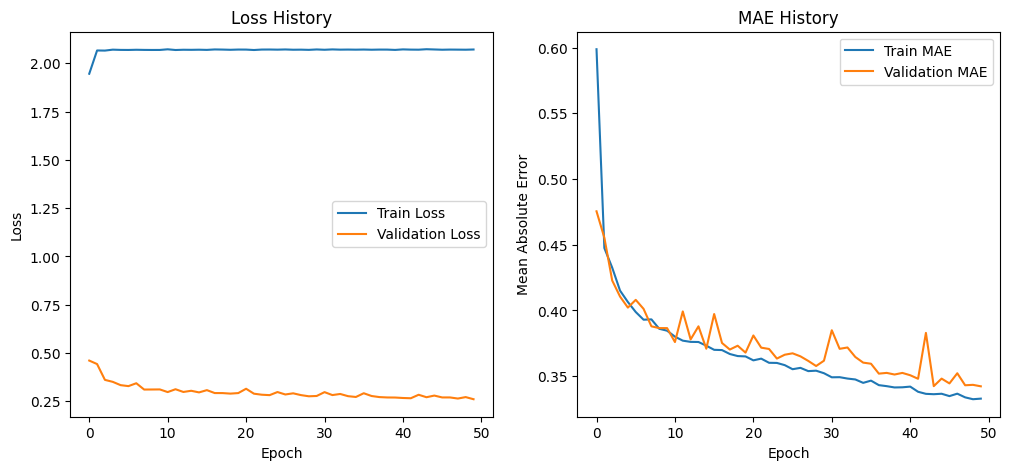

In [7]:
# Plot training history
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss History')

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('MAE History')

plt.show()


## Step 7: Evaluate the Model


In [9]:
# Evaluate the model on test data
test_loss, test_mae = pimtl_model.evaluate(X_test, [y_test, physics_target_test])

print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2520 - mae: 0.3402
Test Loss: 0.26041126251220703
Test MAE: 0.34226322174072266


The result you obtained shows that your model achieved the following:

- **Test Loss**: `0.2604` — This represents the overall loss of the model on the test set. Since you're working with a mean squared error (MSE) loss, this value indicates how well the model predicts both house prices and adheres to the physics-based constraint.
  
- **Test MAE (Mean Absolute Error)**: `0.3423` — This reflects the average difference between predicted and actual house prices on the test set. A lower MAE indicates better accuracy in predicting house prices.

### Interpretation:
1. **Test Loss**: Since this loss is a combination of two objectives (house price prediction and the physics-informed constraint), it’s not directly indicative of performance on house prices alone. It accounts for both tasks, meaning it reflects how well the model balances these two goals.
   
2. **Test MAE**: This metric is more indicative of your model's performance on the main task — house price prediction. An MAE of `0.34` means that, on average, your model's predictions are off by `0.34` units in the house price. Given the scaled data, this can be a relatively small error, but it depends on the actual scale of the targets (house prices).

### Next Steps:

1. **Check Scaling**:
   - Verify the range of the house price target (`y_train` and `y_test`). If the data is scaled, the MAE will also reflect the scaled version. If needed, you can reverse the scaling on the target values and recompute the error in actual house price units.

2. **Adjust Physics Constraint Weight**:
   - You might want to experiment with the weight of the physics constraint (currently set to `0.1`). If you care more about house price prediction accuracy, reducing this weight may lead to better performance on that task.
   
3. **Model Architecture**:
   - Consider adding more layers or increasing the number of neurons in the shared layers. Alternatively, using techniques like dropout or batch normalization might improve generalization.
   
4. **Tuning the Hyperparameters**:
   - Tune the learning rate, batch size, and number of epochs. This might help the model converge better and improve performance.

### Example of Experimentation:
- **Reducing Physics Loss Weight**:
    ```python
    total_loss = price_loss + 0.05 * physics_loss  # Reduce the physics constraint weight
    ```

- **Increase Layers or Units**:
    ```python
    self.shared_layer_1 = layers.Dense(128, activation='relu')  # Increase units
    self.shared_layer_2 = layers.Dense(128, activation='relu')  # Increase units
    ```

### Conclusion:
Your model is working and yielding reasonable results, but you can continue to tune it by experimenting with different weights for the physics constraint, adjusting the model architecture, and possibly improving the data preprocessing.

### Summary of What This Code Does:

1. **Multi-task Learning**: The model simultaneously learns two tasks:
    - Task 1: Predict house prices based on input features.
    - Task 2: Satisfy a physics constraint where house prices increase with certain features (median income and average rooms).
   
2. **Shared Architecture**: Both tasks share a common set of hidden layers to extract useful features, but have separate outputs.

3. **Custom Training Loop**: The model is trained using a custom training step that combines the losses from both tasks and updates the weights accordingly.

4. **Physics-Informed Constraint**: By incorporating domain knowledge (house prices should increase with income and number of rooms), the model aims to generalize better.

This approach can be useful when you want to inject domain-specific constraints into machine learning models, potentially improving their performance and interpretability.

# Implementing Physics-Informed Kolmogorov-Arnold Networks (PIKAR)

## Step 1: Load and Preprocess the California Housing Dataset


In [ ]:
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the California Housing dataset
data = fetch_california_housing()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert targets to float32 for TensorFlow compatibility
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)


## Step 2: Build a PIKAN-Inspired Neural Network


In [ ]:
from tensorflow.keras import layers, models

# Define the PIKAN-inspired network structure
def create_pikan_model(input_shape):
    # Input layer
    inputs = layers.Input(shape=input_shape)

    # Subnet 1
    x1 = layers.Dense(64, activation='relu')(inputs)
    x1 = layers.Dense(32, activation='relu')(x1)
    x1 = layers.Dense(1)(x1)

    # Subnet 2
    x2 = layers.Dense(64, activation='relu')(inputs)
    x2 = layers.Dense(32, activation='relu')(x2)
    x2 = layers.Dense(1)(x2)

    # Subnet 3
    x3 = layers.Dense(64, activation='relu')(inputs)
    x3 = layers.Dense(32, activation='relu')(x3)
    x3 = layers.Dense(1)(x3)

    # Combine the subnets using a sum operation
    combined = layers.Add()([x1, x2, x3])

    # Output layer
    outputs = layers.Dense(1)(combined)

    # Create the model
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Instantiate the model
input_shape = X_train.shape[1:]
pikan_model = create_pikan_model(input_shape)

# Compile the model
pikan_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Display the model architecture
pikan_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 8)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 64)             │            576 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 64)             │            576 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 64)             │            576 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 32)             │          2,080 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 32)             │          2,080 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 32)             │          2,080 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             33 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 1)              │             33 │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 1)              │             33 │ dense_7[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 1)              │              0 │ dense_2[0][0],         │
│                           │                        │                │ dense_5[0][0],         │
│                           │                        │                │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 1)              │              2 │ add[0][0]              │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 8,069 (31.52 KB)

 Non-trainable params: 0 (0.00 B)

## Step 3: Train the Network


In [ ]:
# Train the model
history = pikan_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)


Epoch 1/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 0.8737 - mae: 0.6366 - val_loss: 0.8829 - val_mae: 0.4807
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.4007 - mae: 0.4400 - val_loss: 0.3850 - val_mae: 0.4224
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3892 - mae: 0.4223 - val_loss: 0.3652 - val_mae: 0.4343
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.3290 - mae: 0.4014 - val_loss: 0.3365 - val_mae: 0.4057
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3216 - mae: 0.3969 - val_loss: 0.3192 - val_mae: 0.3857
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3071 - mae: 0.3874 - val_loss: 0.3124 - val_mae: 0.3960
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3214 - mae: 0.3950 - val_loss: 0.3215 - val_mae: 0.4070
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3204 - mae: 0.3798 - val_loss: 0.3107 - val_mae: 0.3869
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - l

## Step 4: Evaluate and Visualize the Results


129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2700 - mae: 0.3460
Test Loss: 0.2761
Test MAE: 0.3453


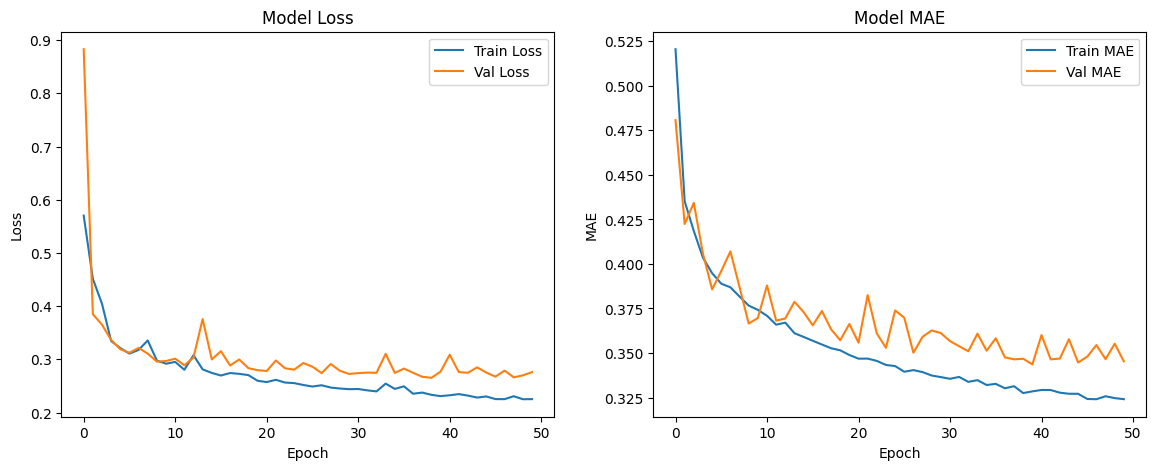

In [ ]:
import matplotlib.pyplot as plt

# Evaluate the model on the test set
test_loss, test_mae = pikan_model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

# Plot training & validation loss values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation MAE values
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.show()
